In [1]:
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.layers import Normalization
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Flatten
from keras import layers
pd.set_option('display.max_rows', 50)
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping 

import random


2021-09-01 11:42:04.356245: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-09-01 11:42:04.356336: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
df_merged = pd.read_csv("data_final_20210826_v3.csv")

In [3]:
df_merged = df_merged[df_merged["reply_count"].notna()].drop(columns = ["reply_count", "avg_followers_count", "avg_following_count" ] )

In [4]:
df_merged

,tweet_date,party,poll,retweet_count,like_count,avg_len_of_tweet,avg_user_tweet_count,avg_ff_ratio,share_of_tweets,share_unique_users,weighted_sentiment,share_of_positive_tweets,share_of_negative_tweets
406,2021-07-23,AFD,11.0,7430.0,50589.0,183.483988,30258.523792,11.717405,0.241723,0.599421,-0.822698,0.028768,0.587842
407,2021-07-23,CDU,28.0,8987.0,53965.0,191.227455,26716.583105,5.530039,0.207085,0.673073,-0.466696,0.035058,0.480465
408,2021-07-23,FDP,12.0,1854.0,15224.0,171.541570,26521.715935,5.561241,0.113623,0.675905,-0.385271,0.061971,0.476905
409,2021-07-23,GRUENE,19.0,7621.0,60041.0,182.306444,24578.680470,4.759415,0.264028,0.619016,-0.267626,0.060460,0.439125
410,2021-07-23,LINKE,7.0,268.0,1625.0,181.312292,36722.935216,2.647902,0.026328,0.616279,-0.050804,0.061462,0.373754
...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,2021-08-26,FDP,12.0,3199.0,29066.0,155.032074,17960.210457,5.051935,0.110768,0.716828,-0.577197,0.056459,0.527460
647,2021-08-26,GRUENE,18.0,9063.0,63348.0,178.698807,20607.243817,6.755195,0.193819,0.638167,-0.149995,0.062775,0.406026
648,2021-08-26,LINKE,7.0,713.0,5282.0,190.801338,20400.862207,1.407351,0.036379,0.590635,-0.134164,0.060201,0.400669
649,2021-08-26,OTHER,6.0,2166.0,11618.0,175.401146,14171.402579,2.100457,0.050955,0.579752,-0.129097,0.087393,0.409742


In [5]:
df_merged = df_merged.replace(np.nan, 0)

In [6]:
df_merged["tweet_date"] = pd.to_datetime(df_merged["tweet_date"])

df_merged = df_merged.groupby([pd.Grouper(key='tweet_date',freq='D'), "party"]).agg({
#     "reply_count": "sum", 
    "retweet_count": "sum",
    "like_count": "sum",
#     "avg_len_of_tweet": "mean" ,
#     "avg_followers_count": "mean" ,
#     "avg_following_count": "mean" ,
    "avg_user_tweet_count" :"mean",
    "avg_ff_ratio" :"mean",
    "share_of_tweets" :"mean",
    "share_unique_users": "mean",
    "weighted_sentiment" : "mean",
    "share_of_positive_tweets": "mean",
    "share_of_negative_tweets" : "mean",
    "poll": "mean"}) 

In [7]:
df_real_true = df_merged.iloc[-7:]

In [41]:
df_merged_final_test

retweet_count  like_count  avg_user_tweet_count  \
tweet_date party                                                     
2021-08-25 AFD           12735.0     88578.0          17066.434510   
           CDU           14495.0    138398.0          21036.563515   
           FDP            2509.0     26967.0          16419.750375   
           GRUENE        13429.0    105854.0          19779.604583   
           LINKE          1674.0     14562.0          29715.697961   
           OTHER          2140.0     14137.0          14027.390013   
           SPD           16909.0    106753.0          24881.782213   

                   avg_ff_ratio  share_of_tweets  share_unique_users  \
tweet_date party                                                       
2021-08-25 AFD         2.813252         0.142871            0.610545   
           CDU         5.076469         0.259018            0.608679   
           FDP         4.976355         0.093089            0.715478   
           GRUENE      3.945781         0.236578            0.584365   
           LINKE       4.379170         0.046913            0.550127   
           OTHER       3.202619         0.046295            0.560913   
           SPD         7.278827         0.175236            0.662231   

                   weighted_sentiment  share_of_positive_tweets  \
tweet_date party                                                  
2021-08-25 AFD              -0.837779                  0.048682   
           CDU              -0.452031                  0.044395   
           FDP              -0.515992                  0.055877   
           GRUENE           -0.190728                  0.061242   
           LINKE            -0.059278                  0.050127   
           OTHER            -0.058430                  0.083082   
           SPD              -0.401099                  0.050722   

                   share_of_negative_tweets  poll  
tweet_date party                                   
2021-08-25 AFD                     0.600921  12.0  
           CDU                     0.484189  22.5  
           FDP                     0.513595  12.5  
           GRUENE                  0.418162  17.5  
           LINKE                   0.375956   7.0  
           OTHER                   0.385278   7.5  
           SPD                     0.475037  21.5

In [9]:
df_merged = df_merged.iloc[:-7]

In [10]:
df_merged_final_test = df_merged.iloc[-7:]

In [11]:
df_merged_final = df_merged.iloc[:-7]

In [12]:
num_features = [ "retweet_count", "like_count", "avg_user_tweet_count","avg_ff_ratio"]
remaing_columns = ["share_of_tweets","share_unique_users","weighted_sentiment","share_of_positive_tweets","share_of_negative_tweets"]

In [13]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()

mm_scaler.fit(df_merged_final[num_features])

numerical_train_scaled = mm_scaler.transform(df_merged_final[num_features])
numerical_test_scaled = mm_scaler.transform(df_merged_final_test[num_features])

In [14]:
df_merged_poll = df_merged_final["poll"] / 100
df_merged_poll_test = df_merged_final_test["poll"] / 100

In [15]:
df_numerical_train_scaled = pd.DataFrame(numerical_train_scaled, columns = num_features, index = df_merged_final.index)


In [16]:
df_train_scaled = pd.concat([df_numerical_train_scaled,df_merged_final[remaing_columns], pd.DataFrame(df_merged_poll, columns = ["poll"], index = df_merged_final.index)] , axis = 1)

In [17]:
df_test_scaled = pd.concat([pd.DataFrame(numerical_test_scaled, columns = num_features, index = df_merged_final_test.index),df_merged_final_test[remaing_columns], pd.DataFrame(df_merged_poll_test, columns = ["poll"], index = df_merged_final_test.index)] , axis = 1)

In [18]:
def subsequence(df, length, start = 0):
    last_possible_start = len(df) - length 
    X = df[start:start + length]
    y = df["poll"][(start + length ) : (start + length + 7)]
    
    return X, y

In [19]:
def multiple_subsequences(df, length):
    
    list_of_X = []
    list_of_y = []
    
    number_of_subsequences = round(len(df) /  7 - (length/7))
    print(number_of_subsequences)
    start = 0
    for num in range(number_of_subsequences):
        temporary_X, temporary_y = subsequence(df, length, start)
        list_of_X.append(temporary_X)
        list_of_y.append(temporary_y)
        start = start + 7
    
    return list_of_X, list_of_y

    
    
    

In [20]:
X_train , y_train = multiple_subsequences(pd.DataFrame(df_train_scaled), 21 )
# X_test , y_test = multiple_subsequences(df_test_scaled, 35)

30


In [21]:
(df_train_scaled.shape[0]/ 7)

33.0

In [22]:
X_train = np.array(X_train)
# X_test = np.array(X_test)
y_train = np.array(y_train)
# y_test = np.array(y_test)


In [23]:
from keras.layers import BatchNormalization


In [24]:
model = Sequential()
# model.add(layers.Masking(mask_value=-9999, input_shape=X_train[0].shape))
model.add(layers.GRU(units=128, activation='tanh', return_sequences=True))
model.add(layers.GRU(units=64, activation='tanh', return_sequences=False))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(7, activation='linear'))


2021-09-01 11:42:09.507567: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-09-01 11:42:09.507679: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-09-01 11:42:09.507724: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LAPTOP-69AIGBNI): /proc/driver/nvidia/version does not exist
2021-09-01 11:42:09.508277: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [25]:
%%time

es = EarlyStopping(patience = 3, restore_best_weights=True)


model.compile(loss='mse', optimizer='adam', metrics=['mae'])

history = model.fit(X_train, y_train ,
          epochs=40, 
          batch_size=1, 
          verbose=1, 
          validation_split=0.2,
          shuffle = False
     )



2021-09-01 11:42:09.679816: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/40
24/24 [==============================] - 7s 89ms/step - loss: 0.0041 - mae: 0.0388 - val_loss: 5.7953e-04 - val_mae: 0.0191
Epoch 2/40
24/24 [==============================] - 1s 33ms/step - loss: 2.2369e-04 - mae: 0.0120 - val_loss: 1.9493e-04 - val_mae: 0.0106
Epoch 3/40
24/24 [==============================] - 1s 33ms/step - loss: 1.9489e-04 - mae: 0.0108 - val_loss: 1.7151e-04 - val_mae: 0.0106
Epoch 4/40
24/24 [==============================] - 1s 33ms/step - loss: 1.8419e-04 - mae: 0.0105 - val_loss: 1.7281e-04 - val_mae: 0.0103
Epoch 5/40
24/24 [==============================] - 1s 33ms/step - loss: 1.8064e-04 - mae: 0.0102 - val_loss: 1.7484e-04 - val_mae: 0.0104
Epoch 6/40
24/24 [==============================] - 1s 33ms/step - loss: 1.8382e-04 - mae: 0.0102 - val_loss: 1.8887e-04 - val_mae: 0.0109
Epoch 7/40
24/24 [==============================] - 1s 33ms/step - loss: 1.8608e-04 - mae: 0.0102 - val_loss: 2.1284e-04 - val_mae: 0.0116
Epoch 8/40
24/24 [=============

In [26]:
df_merged_final_day = np.array(df_test_scaled)
df_merged_final_day = np.expand_dims(df_merged_final_day, axis = 0)

In [27]:
df_prediction = pd.DataFrame(model.predict(df_merged_final_day)).rename( \
                        columns = {0:'AFD',1:'CDU',2:'FDP',3: 'GRUENE',4: 'LINKE', 5:'OTHER', 6: 'SPD'}).round(3)
df_prediction.index = [df_real_true.index[0][0]]

df_prediction

,AFD,CDU,FDP,GRUENE,LINKE,OTHER,SPD
0,0.11,0.235,0.126,0.171,0.079,0.071,0.198


In [45]:
df_merged_final_test.index[0][0]

Timestamp('2021-08-25 00:00:00', freq='D')

In [36]:
df_prediction_2 = pd.DataFrame((df_prediction.iloc[0]) / np.sum(df_prediction.iloc[0])).T
df_prediction_2 = df_prediction_2.round(4)

In [37]:
df_prediction_2

,AFD,CDU,FDP,GRUENE,LINKE,OTHER,SPD
0,0.1111,0.2374,0.1273,0.1727,0.0798,0.0717,0.2


In [38]:
df_true = pd.DataFrame(df_real_true["poll"]).T/100

In [39]:
df_true = pd.DataFrame(df_true.iloc[0]).reset_index().groupby(by = "party").mean().T

In [40]:
df_true

party,AFD,CDU,FDP,GRUENE,LINKE,OTHER,SPD
poll,0.11,0.23,0.12,0.18,0.07,0.06,0.23


In [33]:
df_plotting_spd = df_train_scaled.reset_index().loc[df_train_scaled.reset_index()["party"] == "SPD"].drop(columns = "party")\
[["tweet_date","share_of_tweets", "weighted_sentiment", "share_of_positive_tweets", "share_of_negative_tweets", "poll"]]
df_plotting_cdu = df_train_scaled.reset_index().loc[df_train_scaled.reset_index()["party"] == "CDU"].drop(columns = "party")\
[["tweet_date","share_of_tweets", "weighted_sentiment", "share_of_positive_tweets", "share_of_negative_tweets", "poll"]]


<AxesSubplot:xlabel='tweet_date', ylabel='val'>

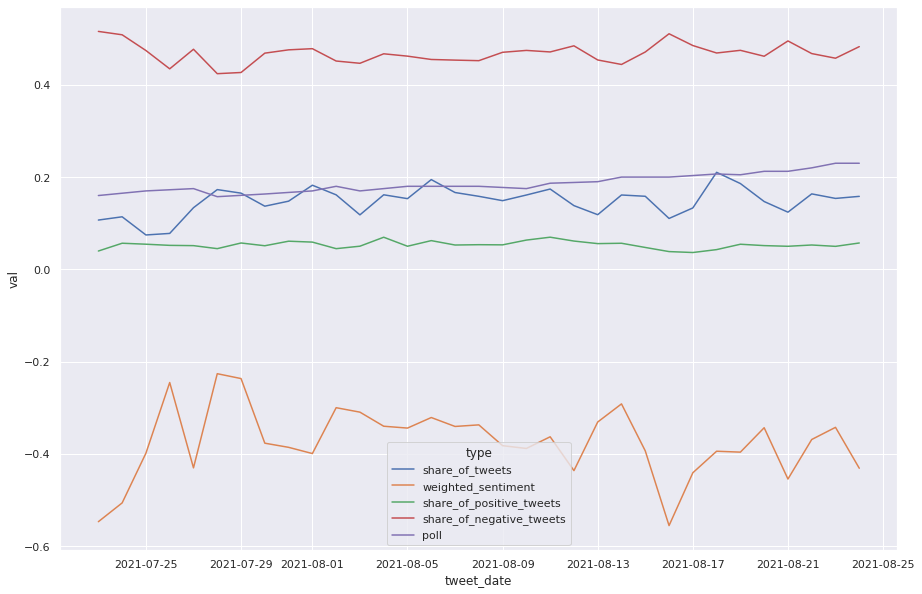

In [34]:
sns.set(rc={'figure.figsize':(15,10)})

new_df = df_plotting_spd.melt(id_vars='tweet_date', 
                 value_name='val', 
                 var_name='type')

sns.lineplot(x='tweet_date', y='val', hue='type', data=new_df)

<AxesSubplot:xlabel='tweet_date', ylabel='val'>

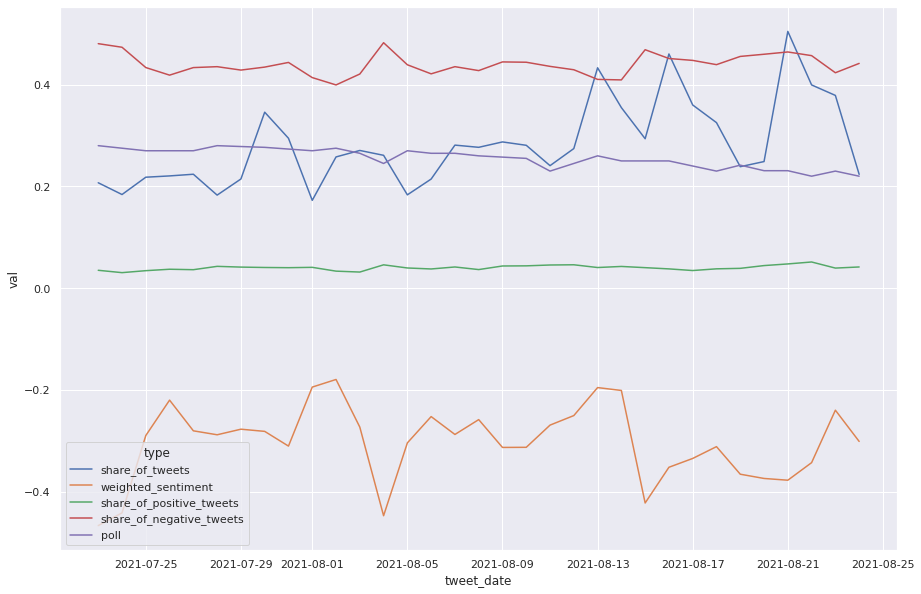

In [35]:
new_df = df_plotting_cdu.melt(id_vars='tweet_date', 
                 value_name='val', 
                 var_name='type')

sns.lineplot(x='tweet_date', y='val', hue='type', data=new_df)

In [46]:
df_merged_final_test

retweet_count  like_count  avg_user_tweet_count  \
tweet_date party                                                     
2021-08-25 AFD           12735.0     88578.0          17066.434510   
           CDU           14495.0    138398.0          21036.563515   
           FDP            2509.0     26967.0          16419.750375   
           GRUENE        13429.0    105854.0          19779.604583   
           LINKE          1674.0     14562.0          29715.697961   
           OTHER          2140.0     14137.0          14027.390013   
           SPD           16909.0    106753.0          24881.782213   

                   avg_ff_ratio  share_of_tweets  share_unique_users  \
tweet_date party                                                       
2021-08-25 AFD         2.813252         0.142871            0.610545   
           CDU         5.076469         0.259018            0.608679   
           FDP         4.976355         0.093089            0.715478   
           GRUENE      3.945781         0.236578            0.584365   
           LINKE       4.379170         0.046913            0.550127   
           OTHER       3.202619         0.046295            0.560913   
           SPD         7.278827         0.175236            0.662231   

                   weighted_sentiment  share_of_positive_tweets  \
tweet_date party                                                  
2021-08-25 AFD              -0.837779                  0.048682   
           CDU              -0.452031                  0.044395   
           FDP              -0.515992                  0.055877   
           GRUENE           -0.190728                  0.061242   
           LINKE            -0.059278                  0.050127   
           OTHER            -0.058430                  0.083082   
           SPD              -0.401099                  0.050722   

                   share_of_negative_tweets  poll  
tweet_date party                                   
2021-08-25 AFD                     0.600921  12.0  
           CDU                     0.484189  22.5  
           FDP                     0.513595  12.5  
           GRUENE                  0.418162  17.5  
           LINKE                   0.375956   7.0  
           OTHER                   0.385278   7.5  
           SPD                     0.475037  21.5